In [1]:
%matplotlib inline
%run ../../import_envs.py
print('probtorch:', probtorch.__version__, 
      'torch:', torch.__version__, 
      'cuda:', torch.cuda.is_available())

probtorch: 0.0+5a2c637 torch: 1.0.0 cuda: True


In [2]:
K = 4

## Load dataset
data_path = data_dir + "ncmm/rings_10size"
Data = []
for i in range(10):
    data = torch.from_numpy(np.load(data_path + '/ob_%d.npy' % (((i+1)*10 + 20) * K))).float()
    Data.append(data)
D = 2
NUM_HIDDEN_LOCAL = 64
NUM_HIDDEN = 32
NUM_NSS = 16
CUDA = torch.cuda.is_available()
DEVICE = 1

RECON_SIGMA = torch.ones(1) * 0.15
# PATH = 'apg-240pts-10samples' 
# PATH = 'apg-240pts-2run-10samples' 
PATH = 'vae-240pts-10samples'

In [3]:
from model_operations_vae import Init_models
models, optimzier = Init_models(K, D, NUM_HIDDEN, NUM_HIDDEN_LOCAL, NUM_NSS, RECON_SIGMA, CUDA, DEVICE, lr=1e-4, RESTORE=True, PATH=PATH)

In [8]:
from testing import Eval
from viz_mc import Viz_MC
from vae import VAE_test

BATCH_SIZE = 5
Viz_INTERVAL = 2
FS = 6
TITLE_FS = 20
OB_MS = 1.0
MU_MARKER = 'X'
MU_MS = 100
OPACITY = 0.5
BOUND = 9
COLORS = ['#EE7733', '#0077BB', '#AA3377', '#009988']
DATA_PTR = 6

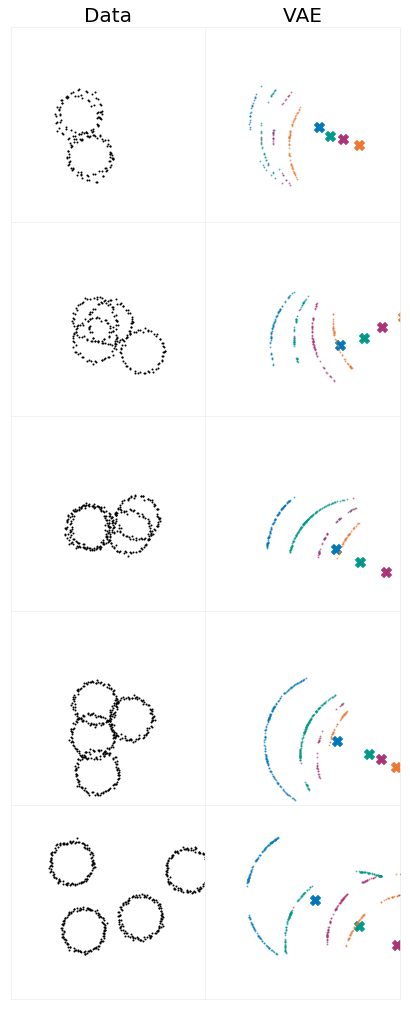

In [9]:
evaluator = Eval(models, K, D, BATCH_SIZE, CUDA, DEVICE)
visualizer = Viz_MC(K, Viz_INTERVAL, FS, TITLE_FS, OB_MS, MU_MARKER, MU_MS, OPACITY, BOUND, COLORS)
Metrics_sample = evaluator.Test_uniform(VAE_test, Data, DATA_PTR, mcmc_steps=0, sample_size=1)
visualizer.Plot_chains(Metrics_sample['data'], Metrics_sample['samples'], Metrics_sample['recon'], filename='ncmm-samples-%d' % DATA_PTR)

In [ ]:
L = 100
Metrics_converge = evaluator.Test_uniform(APG_test_IWAE, Data, DATA_PTR, mcmc_steps=20, sample_size=L)
visualizer.Plot_metrics(Metrics_converge['log_joint'], Metrics_converge['elbos'], Metrics_converge['ess'], sample_size=L, filename='ncmm-metrics-1')